# 🔎 Exploratory Data Analysis (EDA_API)
## 📝 Introduction
Exploratory Data Analysis (EDA) is a crucial process in any data-driven project. It helps uncover patterns, relationships, and structures in data, providing valuable insights before moving to modeling and predictive analysis.

In this project, we will explore a dataset that focuses on environmental factors and health outcomes in different countries across various years.

## Dataset Overview:
The dataset contains the following information:

💓 Cardiovascular: Number of cardiovascular disease-related deaths.
🌍 Environmental Factors: Emissions of nitrogen oxide (NOx), sulphur dioxide (SO2), carbon monoxide (CO), black carbon (BC), ammonia (NH3), and non-methane volatile organic compounds (NMVOC).
💸 Economic Indicator: GDP per capita.
⚖️ Health Indicators: Obesity prevalence percentage, diabetes prevalence percentage, and total deaths.
## Data Description
The dataset consists of the following variables:
 
| Feature                              | Variable Type          | Variable                          | Value Type                                     |
|--------------------------------------|------------------------|------------------------------------|------------------------------------------------|
| id                                   | Objective Feature      | id                                | int                                            |
| Country                              | Objective Feature      | country                           | string                                         |
| Code                                 | Objective Feature      | code                              | string                                         |
| Year                                 | Objective Feature      | year                              | int                                            |
| Cardiovascular                       | Target Variable        | cardiovascular                    | int                                            |
| nitrogen_oxide(NOx)                  | Environmental Feature  | nitrogen_oxide                     | float (tonnes)                                 |
| sulphur_dioxide(SO2)                 | Environmental Feature  | sulphur_dioxide                    | float (tonnes)                                 |
| carbon_monoxide(CO)                  | Environmental Feature  | carbon_monoxide                    | float (tonnes)                                 |
| black_carbon(BC)                     | Environmental Feature  | black_carbon                       | float (tonnes)                                 |
| ammonia(NH3)                         | Environmental Feature  | ammonia                            | float (tonnes)                                 |
| non_methane_volatile_organic_compounds| Environmental Feature  | non_methane_volatile_organic_compounds | float (tonnes)                            |
| gdp_per_capita                       | Economic Indicator     | gdp_per_capita                     | float                                          |
| obesity_prevalence_percentage        | Health Indicator       | obesity_prevalence_percentage      | float (%)                                      |
| diabetes_prevalence_percentage       | Health Indicator       | diabetes_prevalence_percentage     | float (%)                                      |
| TotalDeaths                          | Target Variable        | total_deaths                       | int                                            |


## 🎯 Objectives of the EDA
📊 **Understanding Data Distribution:** Examine the distribution of variables such as cardiovascular deaths, emissions, and health indicators to detect outliers, missing values, or unusual patterns.

🌿 **Environmental Impact on Health:** Explore the relationships between cardiovascular deaths and environmental factors (NOx, SO2, CO, etc.) to identify trends and possible causalities.

💸 **Economic and Health Correlations:** Investigate the link between GDP per capita, obesity, diabetes, and total deaths to understand socioeconomic impacts on health.

🔍 **Trends Over Time:** Analyze how cardiovascular diseases, emissions, and health indicators have evolved over time across different countries and regions.

🛠️ **Data Preparation:** Prepare the data by handling missing values, transforming variables as needed, and ensuring it is ready for further analysis and modeling.

## 📥 Data Loading & Librarys


In [15]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_dir = os.getenv('WORK_DIR')


sys.path.append(work_dir)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

In [17]:
df = pd.read_csv('../../data/owid.csv')
df.head()

,Country,Code,Year,CardiovascularDeaths,nitrogen_oxide(NOx),sulphur_dioxide(SO2),carbon_monoxide(CO),black_carbon(BC),ammonia(NH3),non_methane_volatile_organic_compounds,gdp_per_capita,obesity_prevalence_percentage,diabetes_prevalence_percentage,population,TotalDeaths
0,Afghanistan,AFG,1990,44899,425144.75,12876.9610,1013430.94,8362.603,73274.35,404866.40,NaN,1.3,6.6,12045664.0,147971
1,Afghanistan,AFG,1991,45492,413349.72,12671.9840,983752.06,8494.117,77547.38,381666.22,NaN,1.4,6.7,12238879.0,156844
2,Afghanistan,AFG,1992,46557,272757.10,7732.8310,654986.94,8487.974,83017.66,242334.94,NaN,1.5,6.9,13278982.0,169156
3,Afghanistan,AFG,1993,47951,276675.40,7967.0625,662752.90,8756.007,89469.49,240105.75,NaN,1.5,7.1,14943174.0,182230
4,Afghanistan,AFG,1994,49308,252820.98,7698.9930,657333.00,9055.427,95695.22,234383.25,NaN,1.6,7.2,16250799.0,194795


## 📊 Statistical Summary

Univariate analysis.
- To understand all our variables, at first, we should look at their datatypes. We can do it with info() function:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 6120 non-null   object 
 1   Code                                    6120 non-null   object 
 2   Year                                    6120 non-null   int64  
 3   CardiovascularDeaths                    6120 non-null   int64  
 4   nitrogen_oxide(NOx)                     5880 non-null   float64
 5   sulphur_dioxide(SO2)                    5880 non-null   float64
 6   carbon_monoxide(CO)                     5880 non-null   float64
 7   black_carbon(BC)                        5880 non-null   float64
 8   ammonia(NH3)                            5880 non-null   float64
 9   non_methane_volatile_organic_compounds  5880 non-null   float64
 10  gdp_per_capita                          5103 non-null   floa

interpretion

### 📝 Data Summary and Null Values Analysis

In this section, we generate a summary of the dataset to analyze its structure, including data types, null values, duplicate entries, and the number of unique values for each column. The following code creates a DataFrame to summarize this information:


In [19]:
summary = pd.DataFrame({
    'dtypes': df.dtypes,
    'null count': df.isnull().sum(),
    'duplicate count': df.duplicated().sum(),
    'unique values': df.nunique()
})
summary.T

,Country,Code,Year,CardiovascularDeaths,nitrogen_oxide(NOx),sulphur_dioxide(SO2),carbon_monoxide(CO),black_carbon(BC),ammonia(NH3),non_methane_volatile_organic_compounds,gdp_per_capita,obesity_prevalence_percentage,diabetes_prevalence_percentage,population,TotalDeaths
dtypes,object,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
null count,0,0,0,0,240,240,240,240,240,240,1017,1044,1420,60,0
duplicate count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
unique values,204,204,30,5225,5851,5846,5846,5821,5850,5851,5103,491,245,6047,5725



This explanation summarizes the code and provides insights into the null values, duplicate counts, and unique values in the dataset.


## 🔍 Data imputation

The code snippet performs data cleaning by addressing missing values in the dataset. Specifically, it fills in the missing values for columns related to environmental and health indicators, except for certain categorical columns like `Country`, `Code`, and `Year`.

In [20]:
for col in df.columns:
    if col not in ['id', 'Country', 'Code', 'Year']:  
        df[col] = df.groupby('Year')[col].transform(lambda x: x.fillna(x.median()) if x.notna().sum() > 0 else x) #besity_prevalence_percentage & diabetes_prevalence_percentage just have information until 2016

### 📊 Statistic counts

In [21]:
def statistic_count(num):

    statistic = num.describe().T
    statistic['median'] = num.median()
    statistic = statistic.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(statistic)

In [22]:
numerical = df.select_dtypes('number').iloc[:, 1:]

statistic_count(numerical)

,count,mean,median,std,min,25%,50%,75%,max
CardiovascularDeaths,6120.0,7.316045e+04,1.174200e+04,2.915775e+05,4.00000,2.028000e+03,1.174200e+04,4.254650e+04,4.584273e+06
nitrogen_oxide(NOx),6120.0,4.947497e+05,6.425998e+04,2.031665e+06,0.00000,1.687757e+04,6.425998e+04,2.328210e+05,3.071117e+07
sulphur_dioxide(SO2),6120.0,4.894949e+05,3.332995e+04,2.136664e+06,0.00000,5.442894e+03,3.332995e+04,1.874847e+05,3.778001e+07
carbon_monoxide(CO),6120.0,2.638750e+06,3.746415e+05,1.456791e+07,0.00000,1.103479e+05,3.746415e+05,1.121007e+06,2.152620e+08
black_carbon(BC),6120.0,2.804690e+04,5.438860e+03,1.228942e+05,0.00000,1.545979e+03,5.438860e+03,1.889261e+04,1.921052e+06
ammonia(NH3),6120.0,2.657135e+05,4.922469e+04,1.043341e+06,0.00000,1.038587e+04,4.922469e+04,1.372262e+05,1.256013e+07
non_methane_volatile_organic_compounds,6120.0,6.255125e+05,1.233610e+05,2.256737e+06,0.00000,3.488575e+04,1.233610e+05,3.975936e+05,3.094647e+07
gdp_per_capita,6120.0,1.492863e+04,9.084523e+03,1.734637e+04,246.74171,4.092612e+03,9.084523e+03,1.792202e+04,1.692003e+05
obesity_prevalence_percentage,5508.0,1.487173e+01,1.455000e+01,9.836626e+00,0.30000,6.800000e+00,1.455000e+01,1.990000e+01,6.100000e+01
diabetes_prevalence_percentage,5100.0,7.845922e+00,6.900000e+00,3.803865e+00,1.90000,5.700000e+00,6.900000e+00,8.625000e+00,2.980000e+01


1. **Year**
The data covers a period from 1990 to 2019, with a symmetric distribution (mean and median both 2004.5), suggesting consistency over time with no significant outliers.

2. **Cardiovascular Deaths**
There is a high level of positive skewness, with a mean of 73,160 deaths but a much lower median (11,742). The standard deviation is very high, indicating that a few countries have extremely high cardiovascular death rates (up to 4.5 million), while most have much lower numbers.

3. **Nitrogen_oxide (NOx)**
Emissions show a large positive skew, with some countries contributing disproportionately high emissions (up to 30 million tons). The variability is significant, as shown by the standard deviation of over 2 million tons.

4. **Sulphur_dioxide (SO2)**
Similar to NOx, SO2 emissions are highly skewed, with a few countries emitting very high amounts (up to 37 million tons), while the majority of countries emit far less.

5. **Carbon_monoxide (CO)**
The mean (2.6 million tons) is much higher than the median (374,641 tons), indicating a highly skewed distribution. Some countries emit up to 215 million tons, suggesting significant outliers in emissions data.

6. **GDP_per_capita**
There is considerable variation in wealth across countries. The mean GDP per capita is 14,928 USD, but the median is much lower at 9,084 USD, showing that a few wealthy countries skew the data, while most countries are significantly below the mean.

7. **Obesity_prevalence_percentage**
The distribution of obesity rates is fairly symmetrical, with a mean of 14.87% and a median of 14.55%. While most countries cluster around the median, some have very high rates (up to 61%).

8. **TotalDeaths**
There is a large disparity in total death counts, with a mean of 239,891 deaths but a much lower median (50,257). Some countries experience much higher death tolls (up to 10 million), contributing to significant skewness in the data.

## 📊 Data Distribution

Most of the records seem to contain many outliers, where some values appear to be significantly larger than the majority of the data points.

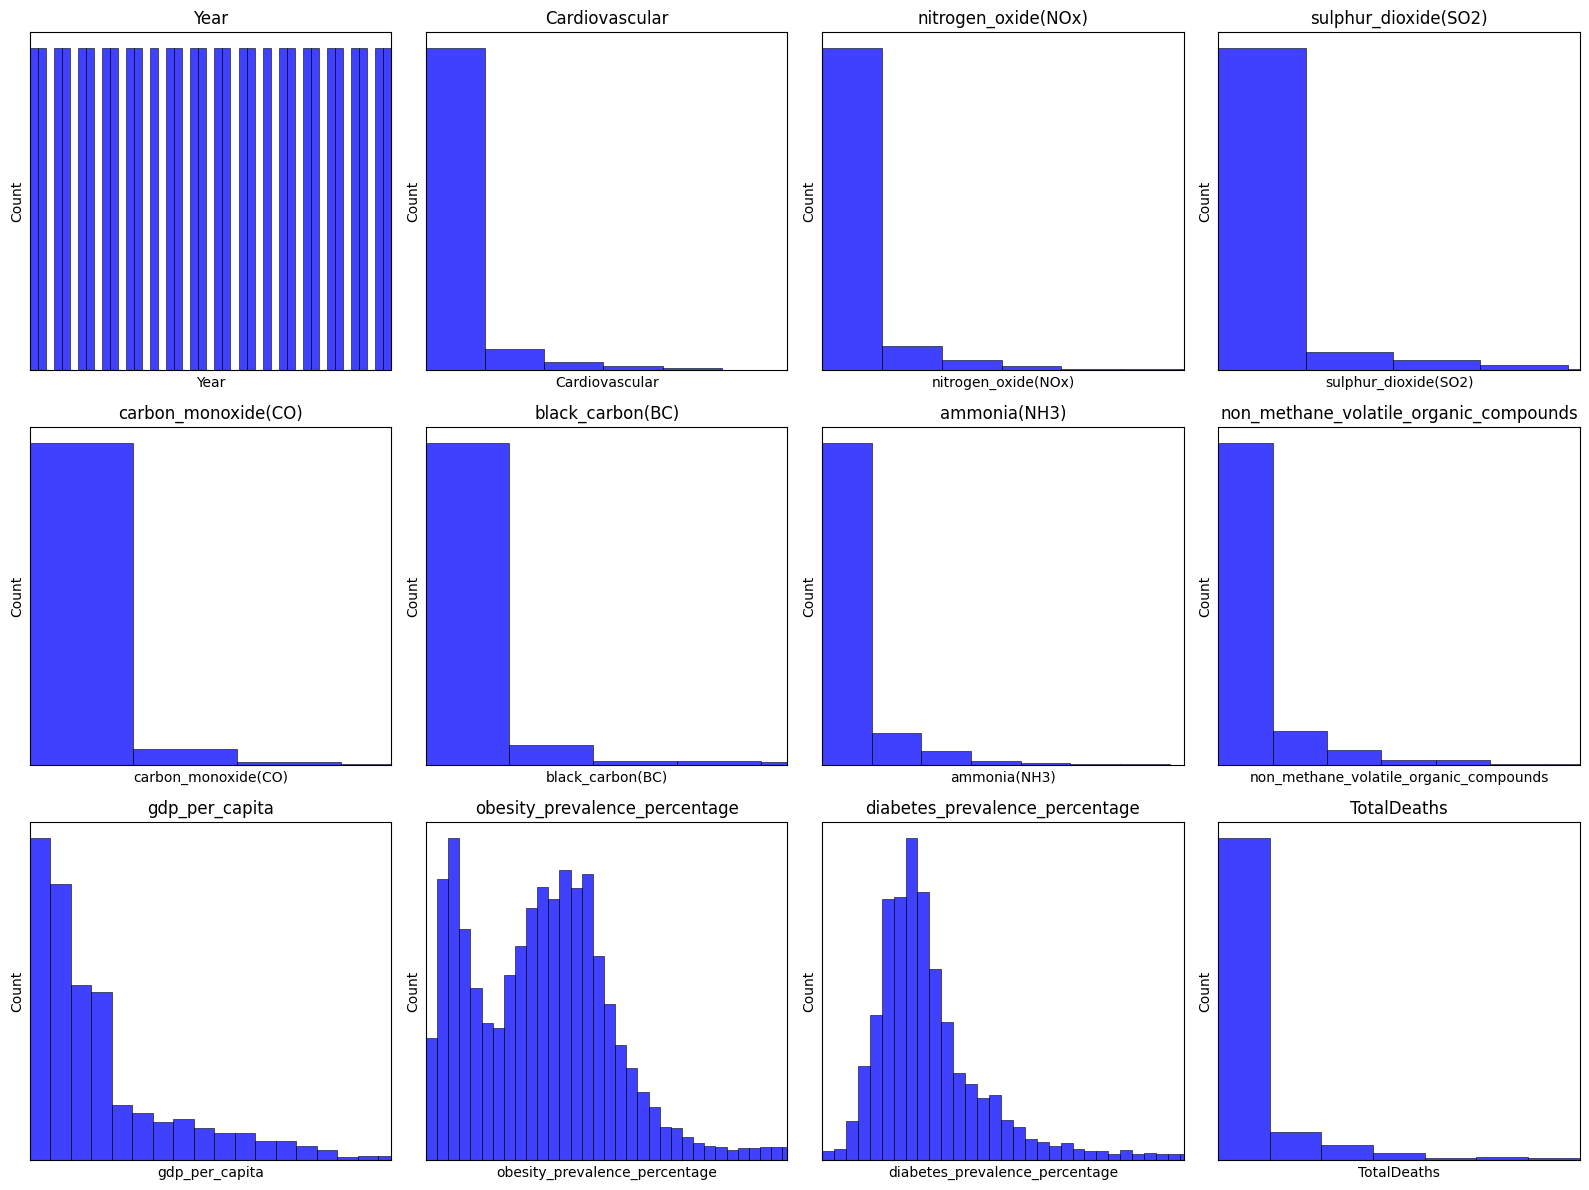

In [19]:
n_cols = 4
n_rows = ceil(numerical.shape[1] / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 4, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(numerical.columns):
    sns.histplot(numerical[column], bins=45, ax=axes[i], color='blue', kde=False)
    axes[i].set_title(column)
    axes[i].set_yticks([])  
    axes[i].set_xticks([])  

    axes[i].set_xlim([numerical[column].min(), numerical[column].quantile(0.98)])

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


**Year:** The data is uniformly distributed over the years, indicating that it was collected within a consistent time range.

**Cardiovascular:** Most of the data related to cardiovascular diseases is concentrated at low values, with only a few high values.

**Nitrogen oxide (NOx) and Sulphur dioxide (SO2):** Both pollutants have a left-skewed distribution, indicating that most values are low, with only a few cases of high levels.

**Carbon monoxide (CO) and Black carbon (BC):** Most values for these pollutants are near zero, with very few elevated values.

**Ammonia (NH3) and Non-methane volatile organic compounds:** The distribution of these compounds follows a similar pattern to other pollutants, with concentrations at low values.

**GDP per capita:** The distribution is right-skewed, with a higher frequency in the lower ranges of GDP per capita, decreasing as GDP increases.

**Obesity prevalence percentage and Diabetes prevalence percentage:** Both distributions show a more dispersed and symmetric pattern, with more cases in the middle range. Obesity seems to have a higher frequency at slightly higher values than diabetes.

**Total deaths:** The distribution is skewed to the left, indicating that most of the total death data is in the lower ranges.

## Data Correlation

#### **CardiovascularDeaths**

- Tiene una **alta correlación positiva** con los contaminantes como **nitrogen oxide (NOx)** (0.87), **sulphur dioxide (SO2)** (0.86), **black carbon (BC)** (0.82), **carbon monoxide (CO)** (0.89), **Ammonia (NH3)** (0.95) y **non-methane volatile organic compounds (NMVOC)** (0.92). Esto sugiere que a medida que aumentan estos contaminantes, también aumentan las **muertes cardiovasculares**.


#### **Contaminantes del aire (NOx, SO2, CO, BC, NH3 y NMVOC)**

- Están **fuertemente correlacionados** entre sí (valores entre 0.84 y 0.95). Esto indica que estos contaminantes tienden a presentarse juntos en el aire. También están correlacionados **positivamente** con la **población** y los **TotalDeaths**, lo que podría indicarnos de un aumento de emisiones contaminantes en áreas con mayor densidad de población o mayores tasas de mortalidad.


#### **gdp_per_capita**

- Tiene una **correlación de 0.21** con el año, lo que indica una **relación leve positiva** entre el crecimiento del **PIB per cápita** a lo largo del tiempo. Esto sugiere un **crecimiento económico gradual**. 

- La correlación con **obesidad (0.31)** y **diabetes (0.10)** es **positiva**, aunque más fuerte con obesidad. Esto podría indicar que un mayor **PIB per cápita** está asociado a un aumento de la **prevalencia de la obesidad**, aunque la relación con la diabetes es más débil.

- De resto, tiene una **correlación muy baja** o cercana a cero con la mayoría de las otras variables. Esto sugiere que el **PIB per cápita** no está directamente relacionado con los niveles de contaminación o las muertes cardiovasculares, al menos en esta muestra. 


#### **Obesity_prevalence_percentage y diabetes_prevalence_percentage**

- La correlación entre estas dos es bastante alta **(0.78)**, lo que refleja una **fuerte asociación** entre la obesidad y la prevalencia de diabetes, algo esperado dado que la obesidad es un **factor de riesgo** para la diabetes tipo 2. 

- La obesidad y diabetes tienen una **correlación de 0.29 y 0.27** respectivamente con el año, lo que sugiere un **aumento moderado** de la obesidad y diabetes a lo largo del tiempo. 

- De resto, muestran **correlaciones negativas** con la mayoría de las variables, especialmente con los contaminantes y las muertes cardiovasculares, lo que podría ser inesperado, aunque esto puede depender de otros factores no presentes en el análisis.


#### **Población y TotalDeaths**

- Tienen una **correlación muy alta** (0.99), lo cual sugiere que en áreas con **mayor densidad poblacional** se registran **más muertes**. Ambas tienen una **alta correlación positiva** con la mayoría de los contaminantes entre 0.78 a 0.98. Esto sugiere que en áreas con más población, hay mayores niveles de contaminación y, en consecuencia, más muertes.



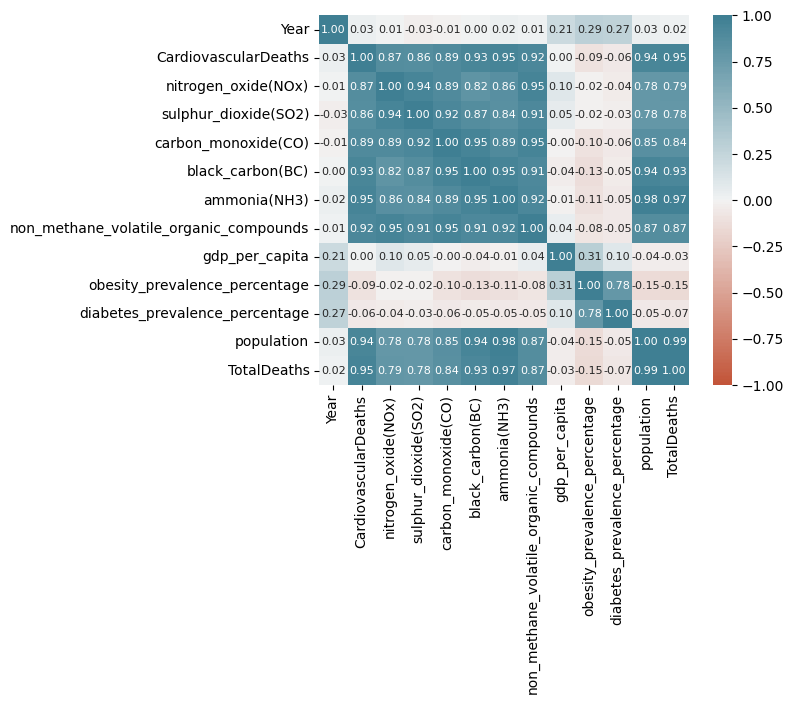

In [23]:
correlation= df.select_dtypes(include=[float, int]).corr()

ax = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt='.2f',
    annot_kws={"size": 8}
)

## Data Visualization